In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance

In [7]:
data = {'age':[25,45,20,30,50,35,40,30,25,40], 'tenure':[2,20,10,5,25,12,15,8,3,18]}
df = pd.DataFrame(data)

In [8]:
# mean vector
mean_vector = df.mean().values

# Covariance matrix  Datapoints in rows and variables in COlumns from the transpose
cov_matrix = np.cov(df.T)

# Inverse of Covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = []


In [9]:
# using the for loop compute the Mahalanobis distance

for i in range(len(df)):
    #Differentiate b/n data point and mean
    diff = df.iloc[i].values - mean_vector
    # compute mahalanobis distance
    mahalanobis_distance = distance.mahalanobis(diff, np.zeros_like(mean_vector), inv_cov_matrix)
    mahalanobis_distances.append(mahalanobis_distance)


# add the results to dataframe
df['Mahalanobis_distance'] = mahalanobis_distances


# res
df

,age,tenure,Mahalanobis_distance
0,25,2,1.359730
1,45,20,1.145436
2,20,10,2.737981
3,30,5,1.215403
4,50,25,1.744279
5,35,12,0.178484
6,40,15,0.688702
7,30,8,0.500134
8,25,3,1.167119
9,40,18,0.839277


##### It is important to note that the number 2 is the farthest distance, however to compute efficiently detect the outlier in Mahalanobis distance:

###### We need a certain number of data points to compute the covariance matrix: small number of data points can make statistical estimation unstable and lead to unrealiable results

######  if the number of data points (n) is less than the number of variables (p) the inverse matrix cannot be computed.

######  if the data distribution widely deviates from the normal distribution, the detection accuracy may be reduced

######  Since outliers are included in the calculation of the covariance matrix, the covariance matrix is susceptible to outliers

####  USE --> robust covariance matrix

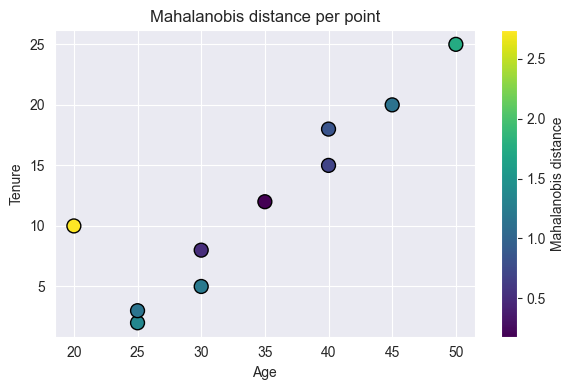

In [10]:
# visualization

# ---------- 1-step visualization ----------
plt.figure(figsize=(6,4))
sc = plt.scatter(df['age'], df['tenure'],
                 c=df['Mahalanobis_distance'],
                 cmap='viridis', s=100, edgecolor='k')
plt.colorbar(sc, label='Mahalanobis distance')
plt.xlabel('Age')
plt.ylabel('Tenure')
plt.title('Mahalanobis distance per point')
plt.tight_layout()
plt.show()